### Veriye İlk Bakış

In [3]:
import seaborn as sns

In [4]:
planets = sns.load_dataset("planets")
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


### İlk sorulacak soru : Verisetinin hikayesi nedir? 

In [5]:
df = planets.copy()

In [4]:
df.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [5]:
df.tail()

,method,number,orbital_period,mass,distance,year
1030,Transit,1,3.941507,NaN,172.0,2006
1031,Transit,1,2.615864,NaN,148.0,2007
1032,Transit,1,3.191524,NaN,174.0,2007
1033,Transit,1,4.125083,NaN,293.0,2008
1034,Transit,1,4.187757,NaN,260.0,2008


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   method          1035 non-null   object 
 1   number          1035 non-null   int64  
 2   orbital_period  992 non-null    float64
 3   mass            513 non-null    float64
 4   distance        808 non-null    float64
 5   year            1035 non-null   int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 48.6+ KB


In [7]:
df.dtypes

method             object
number              int64
orbital_period    float64
mass              float64
distance          float64
year                int64
dtype: object

In [8]:
import pandas as pd

In [9]:
df.method = pd.Categorical(df.method)

In [10]:
df.dtypes

method            category
number               int64
orbital_period     float64
mass               float64
distance           float64
year                 int64
dtype: object

### Veri Setinin Betimlenmesi 

In [12]:
df.shape

(1035, 6)

In [13]:
df.columns

Index(['method', 'number', 'orbital_period', 'mass', 'distance', 'year'], dtype='object')

In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
number,1035.0,1.785507,1.240976,1.000000,1.00000,1.0000,2.000,7.0
orbital_period,992.0,2002.917596,26014.728304,0.090706,5.44254,39.9795,526.005,730000.0
mass,513.0,2.638161,3.818617,0.003600,0.22900,1.2600,3.040,25.0
distance,808.0,264.069282,733.116493,1.350000,32.56000,55.2500,178.500,8500.0
year,1035.0,2009.070531,3.972567,1989.000000,2007.00000,2010.0000,2012.000,2014.0


### Eksik Değerlerin Incelenmesi

In [8]:
#hiç eksik gözlem var mı?
df.isnull().values.any()

True

In [20]:
#hangi değişkende kaçar tane var?
df.isnull().sum()

method              0
number              0
orbital_period     43
mass              522
distance          227
year                0
dtype: int64

In [22]:
df["orbital_period"].fillna(0,inplace=True)

In [24]:
df.isnull().sum()

method              0
number              0
orbital_period      0
mass              522
distance          227
year                0
dtype: int64

In [28]:
df["orbital_period"].fillna(df["orbital_period"].mean(),inplace=True)

In [31]:
df["orbital_period"].isnull().values.any()

False

In [33]:
df.fillna(df.mean(),inplace=True)

In [34]:
df.isnull().values.any()

False

In [35]:
df.isnull().sum()

method            0
number            0
orbital_period    0
mass              0
distance          0
year              0
dtype: int64

# Kategorik Değişken Özellikleri

In [36]:
df = planets.copy()

In [39]:
df["method"] = pd.Categorical(df["method"])

### Sadece Kategorik Değişkenler ve Özetleri 

In [40]:
kat_df = df.select_dtypes(include=["category"])

In [41]:
kat_df.head()

,method
0,Radial Velocity
1,Radial Velocity
2,Radial Velocity
3,Radial Velocity
4,Radial Velocity


### Kategorik Değişkenin Sınıflarına ve Sınıf Sayısına Erişmek 

In [42]:
kat_df["method"].unique()

[Radial Velocity, Imaging, Eclipse Timing Variations, Transit, Astrometry, Transit Timing Variations, Orbital Brightness Modulation, Microlensing, Pulsar Timing, Pulsation Timing Variations]
Categories (10, object): [Radial Velocity, Imaging, Eclipse Timing Variations, Transit, ..., Orbital Brightness Modulation, Microlensing, Pulsar Timing, Pulsation Timing Variations]

In [45]:
kat_df["method"].value_counts().size

10

### Kategorik Değişkenin Sınıflarının Frekanslarına Erişmek

In [48]:
kat_df["method"].value_counts()

Radial Velocity                  553
Transit                          397
Imaging                           38
Microlensing                      23
Eclipse Timing Variations          9
Pulsar Timing                      5
Transit Timing Variations          4
Orbital Brightness Modulation      3
Astrometry                         2
Pulsation Timing Variations        1
Name: method, dtype: int64

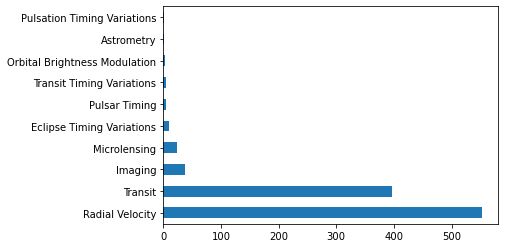

In [60]:
df["method"].value_counts().plot.barh();

### Sürekli Değişken Özetleri 

In [54]:
df_num = df.select_dtypes(include=["int64","float64"])

In [55]:
df_num.head()

,number,orbital_period,mass,distance,year
0,1,269.300,7.10,77.40,2006
1,1,874.774,2.21,56.95,2008
2,1,763.000,2.60,19.84,2011
3,1,326.030,19.40,110.62,2007
4,1,516.220,10.50,119.47,2009


In [56]:
df_num.describe().T

,count,mean,std,min,25%,50%,75%,max
number,1035.0,1.785507,1.240976,1.000000,1.00000,1.0000,2.000,7.0
orbital_period,992.0,2002.917596,26014.728304,0.090706,5.44254,39.9795,526.005,730000.0
mass,513.0,2.638161,3.818617,0.003600,0.22900,1.2600,3.040,25.0
distance,808.0,264.069282,733.116493,1.350000,32.56000,55.2500,178.500,8500.0
year,1035.0,2009.070531,3.972567,1989.000000,2007.00000,2010.0000,2012.000,2014.0


In [58]:
df_num[["distance"]].describe().T

,count,mean,std,min,25%,50%,75%,max
distance,808.0,264.069282,733.116493,1.35,32.56,55.25,178.5,8500.0


### Dağılım Grafikleri

#### Barplot : Kategorik değişkenleri görselleştirmek için kullanılır.

In [12]:
diamonds = sns.load_dataset('diamonds')
df = diamonds.copy()

In [13]:
df.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

In [15]:
import pandas as pd
for i in df.select_dtypes(include=["object"]).columns:
    df[i] = pd.Categorical(df[i])

In [16]:
df.dtypes

carat       float64
cut        category
color      category
clarity    category
depth       float64
table       float64
price         int64
x           float64
y           float64
z           float64
dtype: object

In [71]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [73]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,53940.0,0.797940,0.474011,0.2,0.40,0.70,1.04,5.01
depth,53940.0,61.749405,1.432621,43.0,61.00,61.80,62.50,79.00
table,53940.0,57.457184,2.234491,43.0,56.00,57.00,59.00,95.00
price,53940.0,3932.799722,3989.439738,326.0,950.00,2401.00,5324.25,18823.00
x,53940.0,5.731157,1.121761,0.0,4.71,5.70,6.54,10.74
y,53940.0,5.734526,1.142135,0.0,4.72,5.71,6.54,58.90
z,53940.0,3.538734,0.705699,0.0,2.91,3.53,4.04,31.80


In [18]:
categoric_df = df.select_dtypes(["category"])

In [20]:
categoric_df.columns

Index(['cut', 'color', 'clarity'], dtype='object')

In [83]:
categoric_df["cut"].value_counts() # 

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

### Sınıflama Ölçeği (Nominal): Sınıflama ölçeğinde değişkenlerin aldığı değerler sayısal bir büyüklük ifade etmezler. ... Sıralama Ölçeği (Ordinal): Sınıflama ölçeğinde değişkenlerin aldığı değerler önem derecesi ya da üstünlükleri baz alınarak sıralanır.

In [84]:
categoric_df["color"].value_counts()

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

In [85]:
#ordinal tanımlama
from pandas.api.types import CategoricalDtype

In [86]:
df["cut"].head()

0      Ideal
1    Premium
2       Good
3    Premium
4       Good
Name: cut, dtype: category
Categories (5, object): [Fair, Good, Ideal, Premium, Very Good]

In [97]:
cut_kategoriler=["Fair","Good","Very Good","Premium","Ideal"]

In [98]:
df["cut"] = df["cut"].astype(CategoricalDtype(categories=cut_kategoriler,ordered=True))

In [99]:
df["cut"].head()

0      Ideal
1    Premium
2       Good
3    Premium
4       Good
Name: cut, dtype: category
Categories (5, object): [Fair < Good < Very Good < Premium < Ideal]

In [100]:
#barplot

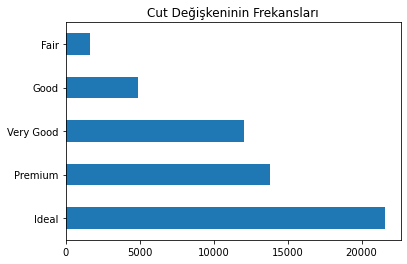

In [105]:
(df["cut"]
 .value_counts()
 .plot.barh()
 .set_title("Cut Değişkeninin Frekansları")
); # Pandas kullanarak görselleştirme

In [108]:
df["cut"].index

RangeIndex(start=0, stop=53940, step=1)

In [25]:
df.cut.value_counts().values

array([21551, 13791, 12082,  4906,  1610])

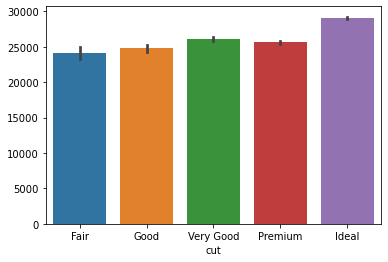

In [118]:
sns.barplot(x="cut",y=df["cut"].index,data=df);

### Çaprazlamalar 

In [3]:
import seaborn as sns
from pandas.api.types import CategoricalDtype
diamonds = sns.load_dataset('diamonds')
df = diamonds.copy()
cut_categories = ["Fair","Good","Very Good","Premium","Ideal"]
df["cut"] = df["cut"].astype(CategoricalDtype(categories=cut_categories,ordered=True))
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [123]:
df["cut"].head()

0      Ideal
1    Premium
2       Good
3    Premium
4       Good
Name: cut, dtype: category
Categories (5, object): [Fair < Good < Very Good < Premium < Ideal]

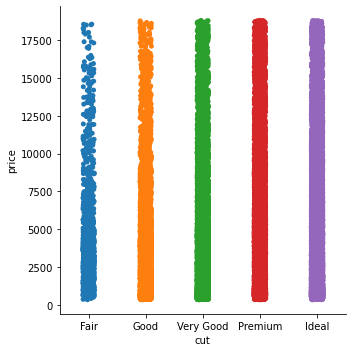

In [124]:
sns.catplot(x="cut",y="price",data=df);

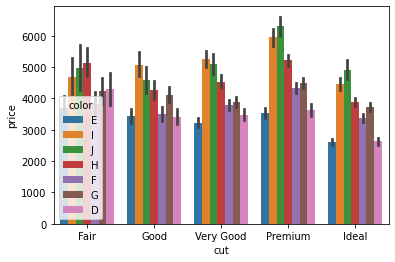

In [125]:
sns.barplot(x="cut",y="price",hue="color",data=df);

In [127]:
df.groupby(["cut","color"])["price"].mean() # Doğrulama , Grafik doğru mu ?

cut        color
Fair       D        4291.061350
           E        3682.312500
           F        3827.003205
           G        4239.254777
           H        5135.683168
           I        4685.445714
           J        4975.655462
Good       D        3405.382175
           E        3423.644159
           F        3495.750275
           G        4123.482204
           H        4276.254986
           I        5078.532567
           J        4574.172638
Very Good  D        3470.467284
           E        3214.652083
           F        3778.820240
           G        3872.753806
           H        4535.390351
           I        5255.879568
           J        5103.513274
Premium    D        3631.292576
           E        3538.914420
           F        4324.890176
           G        4500.742134
           H        5216.706780
           I        5946.180672
           J        6294.591584
Ideal      D        2629.094566
           E        2597.550090
           F        337

### Histogram ve Yoğunluk 

In [128]:
df = diamonds.copy()
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


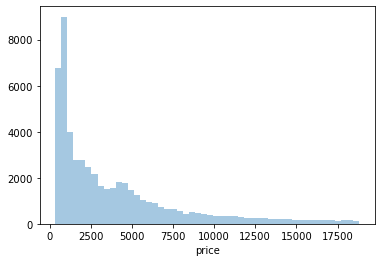

In [131]:
sns.distplot(df.price,kde=False);

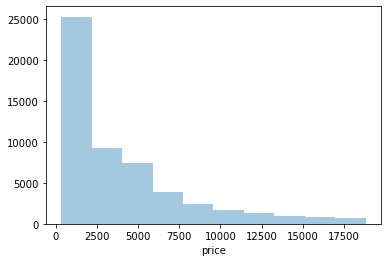

In [133]:
sns.distplot(df.price,bins=10,kde=False); # bins : 10 sütuna bölüyor graph ı

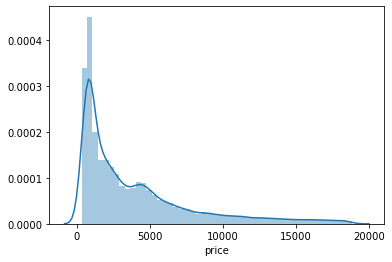

In [134]:
sns.distplot(df.price);

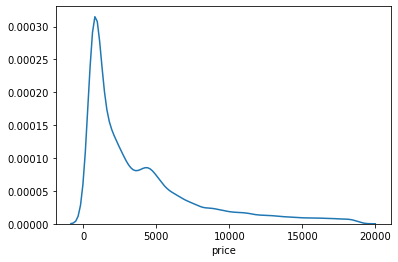

In [135]:
sns.distplot(df.price,hist=False); # Yoğunluk Graph ı

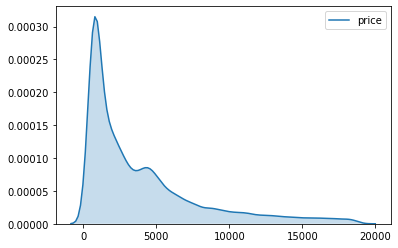

In [137]:
sns.kdeplot(df.price,shade=True);

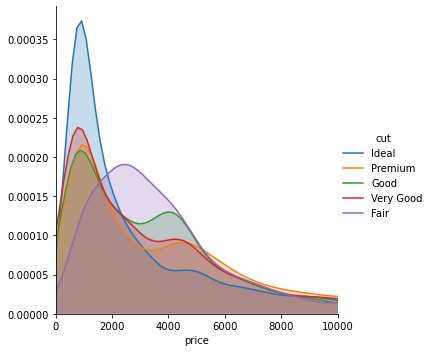

In [140]:
(sns
 .FacetGrid(df,
              hue="cut",
              height=5,
              xlim=(0,10000))
 .map(sns.kdeplot,"price",shade=True)
 .add_legend()
);

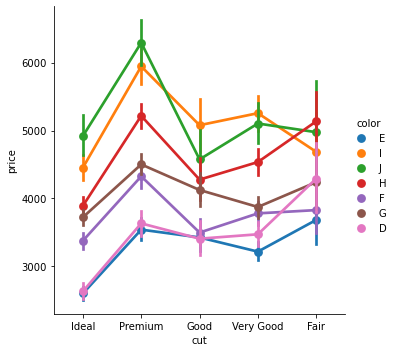

In [141]:
sns.catplot(x="cut",y="price",hue="color",kind="point",data=df);

### Boxplot 

In [4]:
tips = sns.load_dataset('tips')
df = tips.copy()
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [143]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


In [144]:
df["sex"].value_counts()

Male      157
Female     87
Name: sex, dtype: int64

In [145]:
df["smoker"].value_counts()

No     151
Yes     93
Name: smoker, dtype: int64

In [146]:
df["day"].value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

In [147]:
df["time"].value_counts()

Dinner    176
Lunch      68
Name: time, dtype: int64

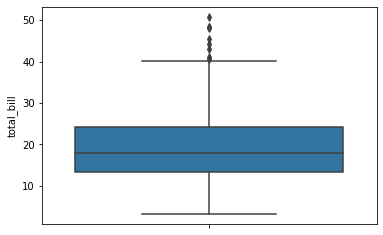

In [7]:
sns.boxplot(x=df["total_bill"],orient="v")

### Boxplot Çaprazlamalar 

In [8]:
# Hangi günler daha fazla kazanıyoruz?
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


In [13]:
df.groupby("day")["total_bill"].describe()

,count,mean,std,min,25%,50%,75%,max
day,,,,,,,,
Thur,62.0,17.682742,7.886170,7.51,12.4425,16.20,20.1550,43.11
Fri,19.0,17.151579,8.302660,5.75,12.0950,15.38,21.7500,40.17
Sat,87.0,20.441379,9.480419,3.07,13.9050,18.24,24.7400,50.81
Sun,76.0,21.410000,8.832122,7.25,14.9875,19.63,25.5975,48.17


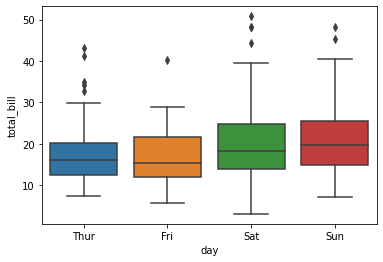

In [14]:
sns.boxplot(x="day",y="total_bill",data=df); 
#Pazar günü daha az hesap ödense de daha çok kazanılmış

In [15]:
# sabah mı akşam mı daha çok kazanıyoruz

In [16]:
df.groupby("time")["total_bill"].describe()

,count,mean,std,min,25%,50%,75%,max
time,,,,,,,,
Lunch,68.0,17.168676,7.713882,7.51,12.2350,15.965,19.5325,43.11
Dinner,176.0,20.797159,9.142029,3.07,14.4375,18.390,25.2825,50.81


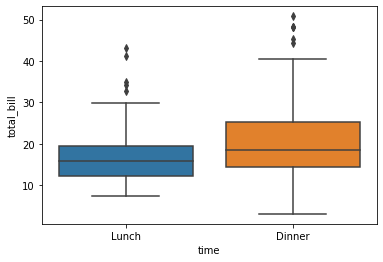

In [19]:
sns.boxplot(x="time",y="total_bill",data=df); #akşam yemeklerinde daha çok kazanılıyor.

In [20]:
# yemeğe gelen grup un size ı ile total bill arasında doğru orantı var mı?

In [21]:
df.groupby("size")["total_bill"].describe()

,count,mean,std,min,25%,50%,75%,max
size,,,,,,,,
1,4.0,7.242500,3.010729,3.07,6.2050,7.915,8.9525,10.07
2,156.0,16.448013,6.043729,5.75,12.4525,15.370,19.6900,40.55
3,38.0,23.277632,9.407065,10.33,16.9400,20.365,27.7750,50.81
4,37.0,28.613514,8.608603,16.49,21.5000,25.890,34.8100,48.33
5,5.0,30.068000,7.340396,20.69,28.1500,29.850,30.4600,41.19
6,4.0,34.830000,9.382000,27.05,29.1125,32.050,37.7675,48.17


In [25]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


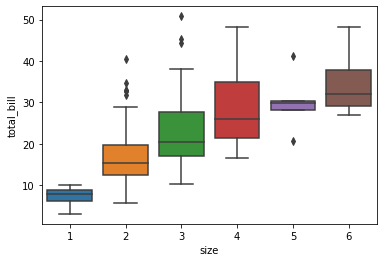

In [27]:
sns.boxplot(x="size",y="total_bill",data=df);

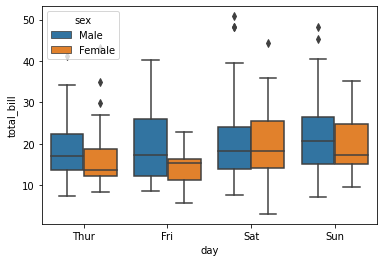

In [30]:
sns.boxplot(x="day",y="total_bill",hue="sex",data=df);
#Sadece Cumartesi günler kadınlar daha fazla hesap ödüyor.

### Violin 

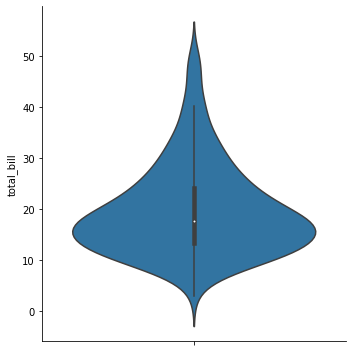

In [31]:
sns.catplot(y="total_bill",kind="violin",data=df);

## Korelasyon Grafikleri : Değişkenler arasındaki ilişkiyi ifaden terim 

## Scatterplot

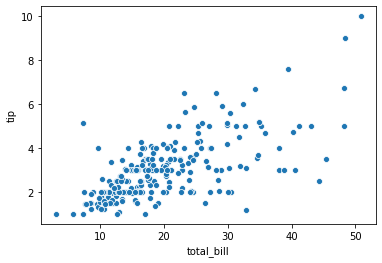

In [33]:
sns.scatterplot(x="total_bill",y="tip",data=df);

### Çaprazlama 

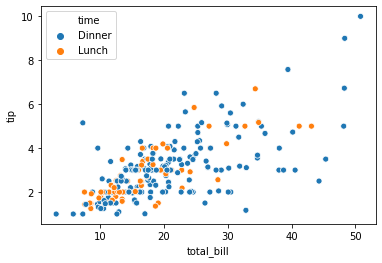

In [34]:
sns.scatterplot(x="total_bill",y="tip",hue="time",data=df);

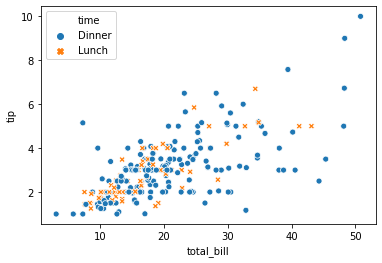

In [35]:
sns.scatterplot(x="total_bill",y="tip",hue="time",style="time",data=df);

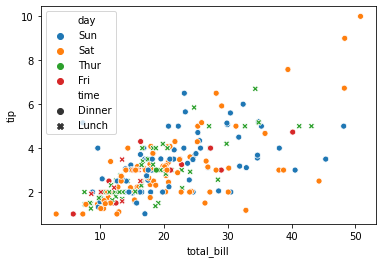

In [36]:
sns.scatterplot(x="total_bill",y="tip",hue="day",style="time",data=df);

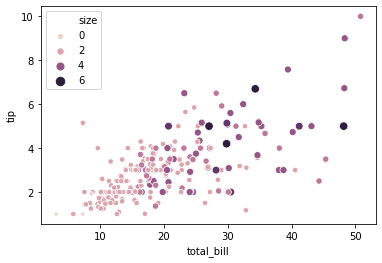

In [38]:
sns.scatterplot(x="total_bill",y="tip",hue="size",size="size",data=df);

### Doğrusal İlişkinin Gösterilmesi 

In [39]:
import matplotlib.pyplot as plt

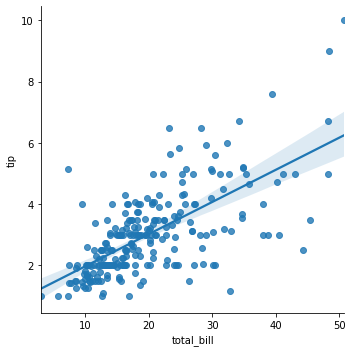

In [40]:
sns.lmplot(x="total_bill",y="tip",data=df);

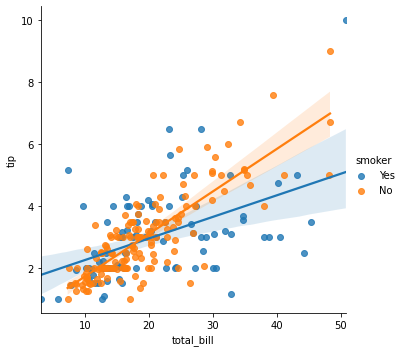

In [41]:
sns.lmplot(x="total_bill",y="tip",hue="smoker",data=df);

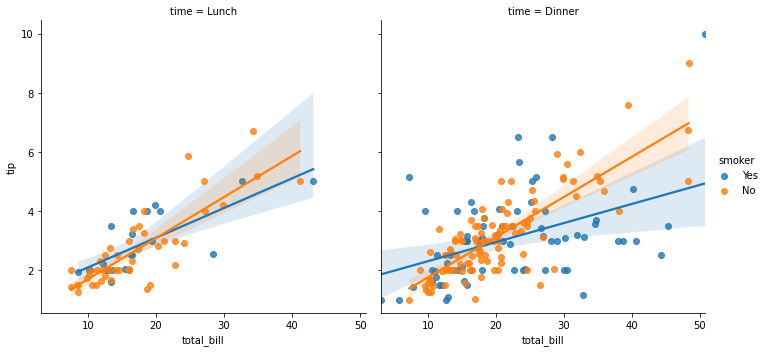

In [42]:
sns.lmplot(x="total_bill",y="tip",hue="smoker",col="time",data=df);

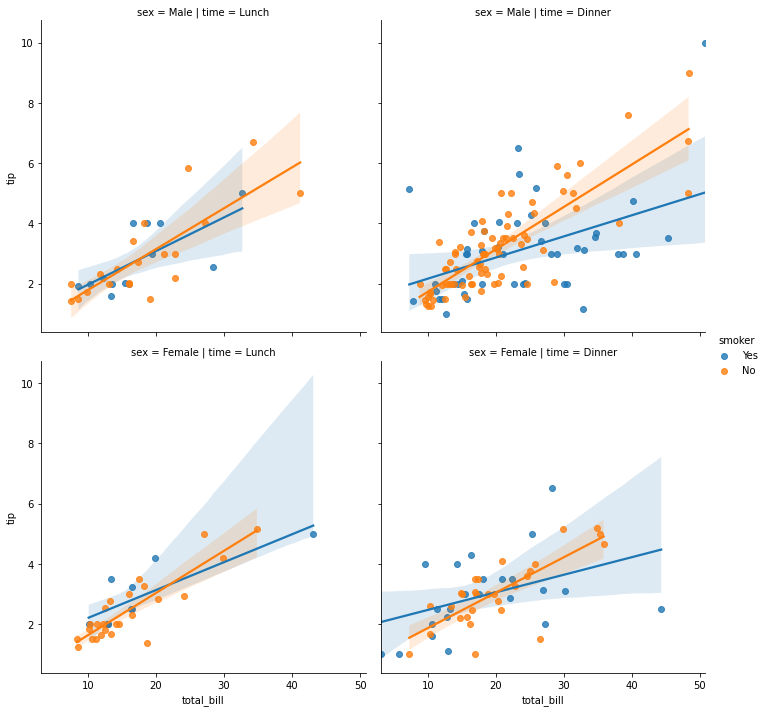

In [43]:
sns.lmplot(x="total_bill",y="tip",hue="smoker",col="time",row="sex",data=df);

### ScatterPlot Matrisi 

In [44]:
iris = sns.load_dataset('iris')
df = iris.copy()
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [45]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


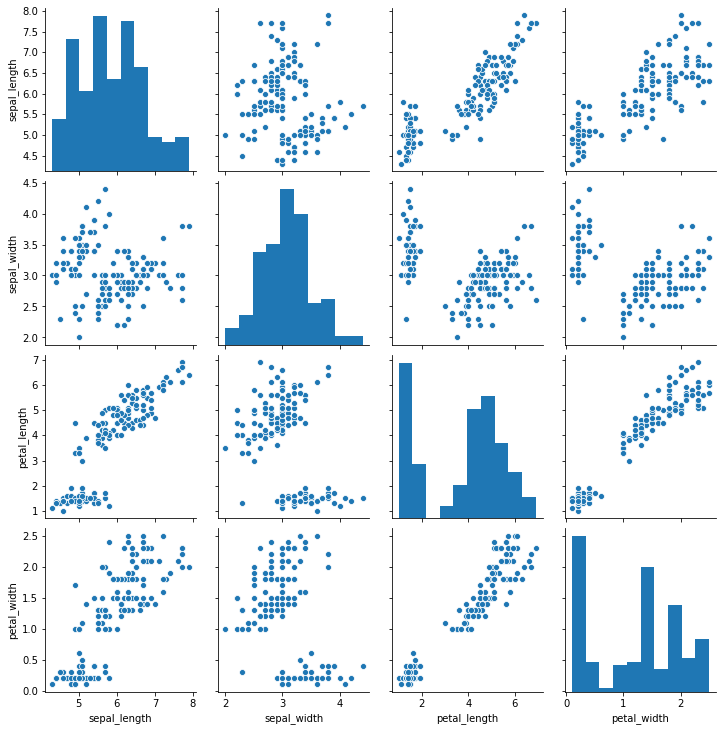

In [47]:
sns.pairplot(df);

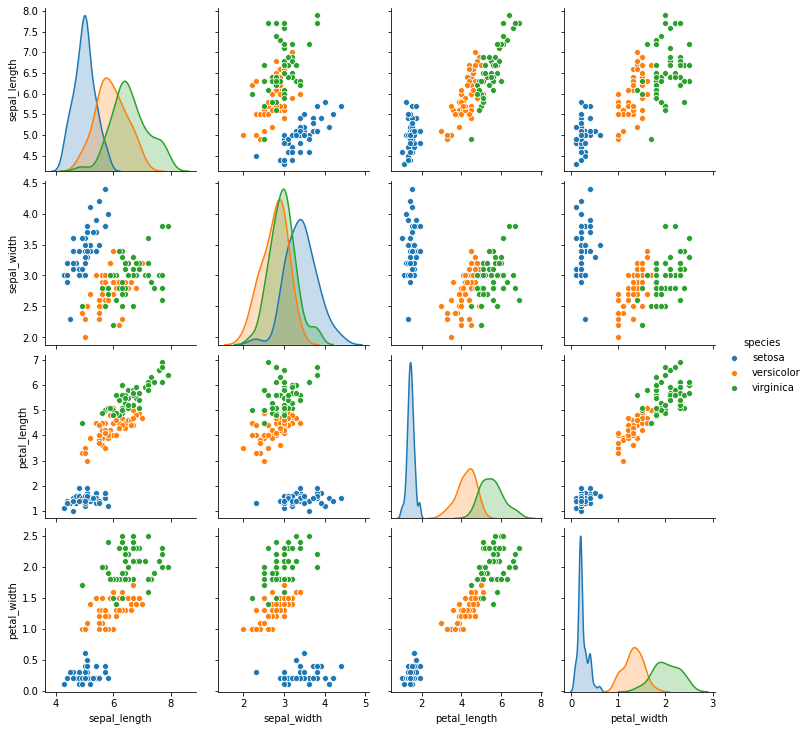

In [48]:
sns.pairplot(df,hue="species");

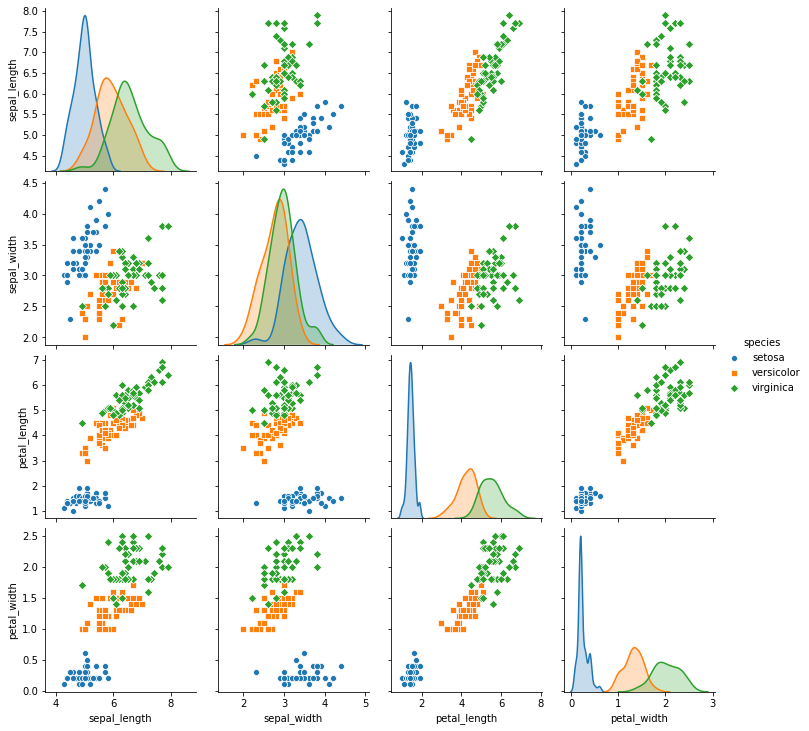

In [49]:
sns.pairplot(df,hue="species",markers=["o","s","D"]);

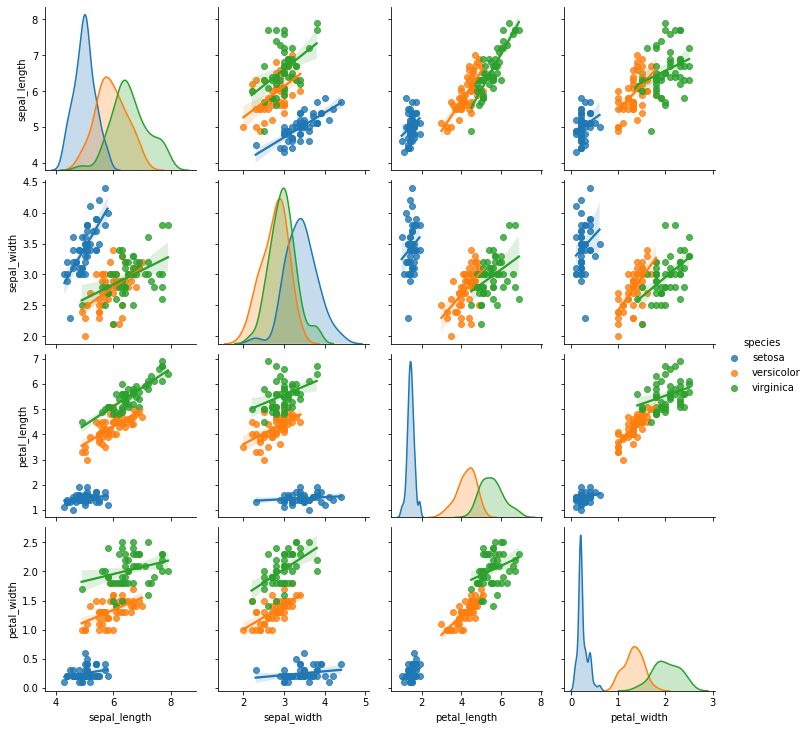

In [52]:
sns.pairplot(df,kind="reg",hue="species");

### Heat Map 

In [53]:
flights = sns.load_dataset('flights')
df = flights.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   year        144 non-null    int64   
 1   month       144 non-null    category
 2   passengers  144 non-null    int64   
dtypes: category(1), int64(2)
memory usage: 2.9 KB


In [54]:
df.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [57]:
df[["passengers"]].describe().T

,count,mean,std,min,25%,50%,75%,max
passengers,144.0,280.298611,119.966317,104.0,180.0,265.5,360.5,622.0


In [59]:
df = df.pivot("year","month","passengers")

In [60]:
df

month,January,February,March,April,May,June,July,August,September,October,November,December
year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201
1954,204,188,235,227,234,264,302,293,259,229,203,229
1955,242,233,267,269,270,315,364,347,312,274,237,278
1956,284,277,317,313,318,374,413,405,355,306,271,306
1957,315,301,356,348,355,422,465,467,404,347,305,336


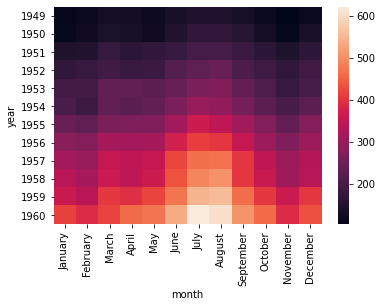

In [61]:
sns.heatmap(df);

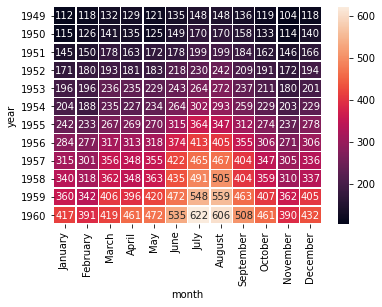

In [68]:
sns.heatmap(df,annot=True,fmt="d",linewidths=.4,cbar=True);

### Çizgi Grafik 

In [69]:
fmri = sns.load_dataset("fmri")
df = fmri.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1064 entries, 0 to 1063
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   subject    1064 non-null   object 
 1   timepoint  1064 non-null   int64  
 2   event      1064 non-null   object 
 3   region     1064 non-null   object 
 4   signal     1064 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 41.7+ KB


In [70]:
df.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


In [78]:
df.values

array([['s13', 18, 'stim', 'parietal', -0.017551581538],
       ['s5', 14, 'stim', 'parietal', -0.0808829319505],
       ['s12', 18, 'stim', 'parietal', -0.0810330187333],
       ...,
       ['s12', 7, 'cue', 'frontal', -0.00493910613621],
       ['s11', 7, 'cue', 'frontal', -0.0253667098182],
       ['s0', 0, 'cue', 'parietal', -0.00689923478092]], dtype=object)

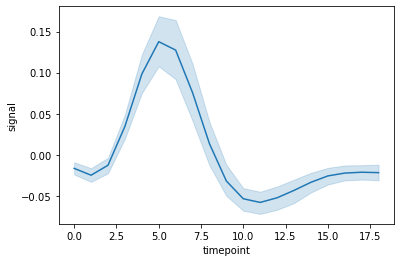

In [79]:
sns.lineplot(x="timepoint",y="signal",data=df)

In [81]:
import pandas_datareader as pr

In [82]:
df = pr.get_data_yahoo("AAPL",start="2019-01-01",end="2020-07-09")

In [83]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-01-02,158.850006,154.229996,154.889999,157.919998,37039700.0,154.516388
2019-01-03,145.720001,142.000000,143.979996,142.190002,91312200.0,139.125412
2019-01-04,148.550003,143.800003,144.529999,148.259995,58607100.0,145.064575
2019-01-07,148.830002,145.899994,148.699997,147.929993,54777800.0,144.741714
2019-01-08,151.820007,148.520004,149.559998,150.750000,41025300.0,147.500916


In [84]:
df.shape

(383, 6)

In [85]:
close = df["Close"].copy()

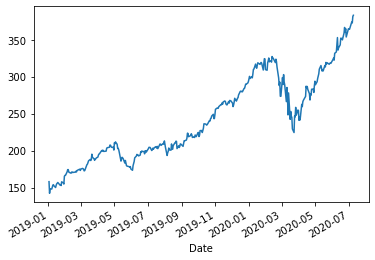

In [87]:
close.plot();

In [88]:
close.index

DatetimeIndex(['2019-01-02', '2019-01-03', '2019-01-04', '2019-01-07',
               '2019-01-08', '2019-01-09', '2019-01-10', '2019-01-11',
               '2019-01-14', '2019-01-15',
               ...
               '2020-06-25', '2020-06-26', '2020-06-29', '2020-06-30',
               '2020-07-01', '2020-07-02', '2020-07-06', '2020-07-07',
               '2020-07-08', '2020-07-09'],
              dtype='datetime64[ns]', name='Date', length=383, freq=None)

In [90]:
import pandas as pd

In [91]:
close.index = pd.DatetimeIndex(close.index)

In [92]:
close.head()

Date
2019-01-02    157.919998
2019-01-03    142.190002
2019-01-04    148.259995
2019-01-07    147.929993
2019-01-08    150.750000
Name: Close, dtype: float64

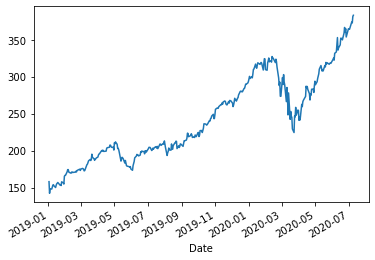

In [93]:
close.plot()